### ETL Proyecto Henry Individual

1. Importamos las librerías que vamos a necesitar

In [1]:
#pip install missingno

In [2]:
# Importar las librerías que necesitaremos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos warnings para evitar los mensajes de error
import warnings

warnings.filterwarnings("ignore")

# Librerías adicionales
from ast import literal_eval  # Convierte string a list
import random #Recortar dataset
import missingno as msno

# Establecer opciones de visualización para mostrar todas las columnas y filas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
movies = pd.read_csv("movies_dataset.csv")
credits = pd.read_csv("credits.csv")

# Ordenamos las columnas
movies = movies.reindex(
    columns=["id","adult",
        "belongs_to_collection",
        "budget",
        "genres",
        "homepage",
        "imdb_id",
        "original_language",
        "original_title",
        "overview",
        "popularity",
        "poster_path",
        "production_companies",
        "production_countries",
        "release_date",
        "revenue",
        "runtime",
        "spoken_languages",
        "status",
        "tagline",
        "title",
        "video",
        "vote_average",
        "vote_count",
    ]
)
credits = credits.reindex(columns=["id", "cast", "crew"])

In [4]:
movies.head(1)

,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [5]:
credits.head(1)

,id,cast,crew
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


2. Información general del proyecto

In [6]:
print(movies.shape)
print(credits.shape)

(45466, 24)
(45476, 3)


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45466 non-null  object 
 1   adult                  45466 non-null  object 
 2   belongs_to_collection  4494 non-null   object 
 3   budget                 45466 non-null  object 
 4   genres                 45466 non-null  object 
 5   homepage               7782 non-null   object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45476 non-null  int64 
 1   cast    45476 non-null  object
 2   crew    45476 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


3. Cambiamos las columnas por su tipo de columna adecuado

In [9]:
#Columnas object a numéricas 
columnas_numericas = ['budget','popularity']

for col in columnas_numericas:
    movies[col] =  pd.to_numeric(movies[col], errors='coerce')
    movies.dropna(subset=[col], inplace=True)

#Convertimos revenue a int
movies['id'] =  pd.to_numeric(movies['id'], errors='coerce')
movies['id'] = movies['id'].astype('int64')

#Columnas object a datetime
movies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")

4. Unimos ambos dataset por la columna 'id'

In [10]:
df = movies.merge(credits, on='id')
df.head(1)

,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."


In [11]:
print('la forma del nuevo dataset es de:', df.shape)

la forma del nuevo dataset es de: (45535, 26)


5. Revisamos duplicados y procesamos

In [12]:
peliculas = df['title'].duplicated().sum()
print(f'El dataset movies tiene {peliculas} peliculas duplicadas')

El dataset movies tiene 3259 peliculas duplicadas


In [13]:
df.drop_duplicates(subset='title', inplace=True)

6. Valores nulos y procesamiento

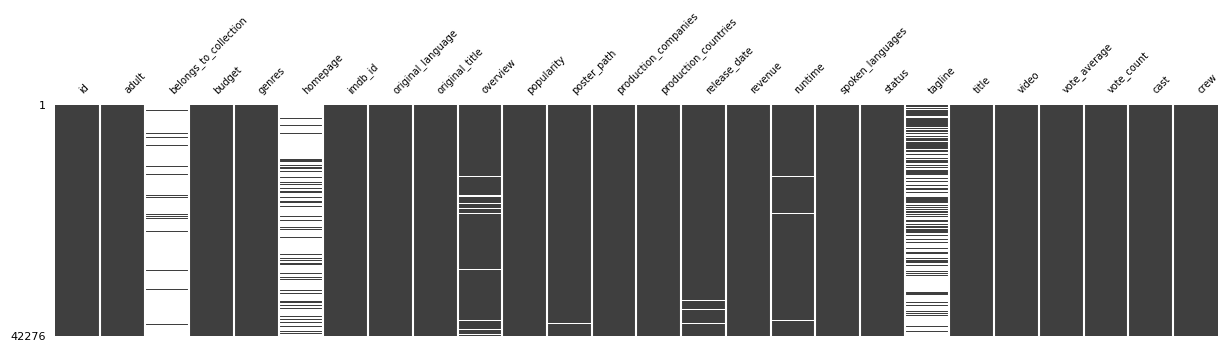

In [14]:
fig,ax = plt.subplots(figsize=(15,3))
msno.matrix(df, ax=ax,fontsize=7)
plt.show()

In [15]:
#Definimos las columnas categóricas
columnas_categoricas = [col for col in df.columns if df[col].dtype == "object"]

In [16]:
# Rellenamos con zero las columnas revenue, budget y runtime
rellenar_zero = ["revenue", "budget"]
df[rellenar_zero] = df[rellenar_zero].fillna(0)
df['runtime'] = df['runtime'].fillna(0)

# Eliminamos los valores nulos de la columna release_date (NaT: Not a time) y usamos how='all' para borrar todos los nulos
df.dropna(subset=["release_date"], inplace=True)

# Convertimos los nulos de las columnas categoricas en None
for col in columnas_categoricas:
    df[col].fillna("None", inplace=True)

7. Desanidamos columnas y extraemos valores que vamos a necesitar

In [17]:
#Revisamos valores de columnas anidadas
print(df["belongs_to_collection"][0])
print(df["production_companies"][0])
print(df["production_countries"][0])
print(df["spoken_languages"][0])
print(df["crew"][0])
print(df["cast"][0])
print(df["genres"][0])

{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
[{'name': 'Pixar Animation Studios', 'id': 3}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohe

In [18]:
#Aplicamos literal eval para convertir a listas los strings
columnas_to_eval = ["belongs_to_collection","production_companies","production_countries","spoken_languages","crew","cast","genres"]

for col in columnas_to_eval:
    df[col] = df[col].apply(literal_eval)

Belongs to collection
<small> De este diccionario solo necesitaremos el nombre de la colección

* La desanidamos sola porque a diferencia de las otras columnas anidadas es un solo diccionario, y no es una lista de diccionarios

In [19]:
collections = []
for i in df["belongs_to_collection"]:
    try:
        collections.append(i["name"])
    except:
        collections.append("None")

df["collections"] = collections

Definimos una función para desanidar las siguientes columnas
<small>

* Production Companies: De este diccionario solo necesitaremos el nombre de la colección
* Production Countries: De este diccionario solo necesitaremos el nombre del país
* Spoken Languages: De este diccionario solo necesitaremos el idioma de la película

In [20]:
def desanidar_columna(col, name):
    new_list = []
    for i in col:
        try:
            new_list.append(i[0]["name"])
        except:
            new_list.append("None")

    df[name] = new_list

In [21]:
desanidar_columna(df["production_companies"], name="company")
desanidar_columna(df["production_countries"], name="country")
desanidar_columna(df["spoken_languages"], name="language")

Funcion para la columna Crew: <small> Seleccionaremos solo al director

In [22]:
def obtener_director(row):
    for person_dict in row:
        if person_dict["job"] == "Director":
            return person_dict["name"]
    return None

df["director"] = df["crew"].apply(obtener_director)
df["director"] = df["director"].fillna('Desconocido')


Definimos otra funcion para desanidar las columna genres: <small> Nos brindan una lista de diccionarios con los 3 principales generos que describen a la película

In [23]:
def extraer_generos(row):
    try:
        genres = [genre["name"] for genre in row]
        return genres
    except:
        return "None"

df["genre"] = df["genres"].apply(extraer_generos)

Definimos otra funcion para desanidar las columna genres: <small> Nos brindan una lista de diccionarios con los 3 principales generos que describen a la película

In [24]:
def extraer_cast_principal(row):
    try:
        cast = [cast["name"] for cast in row]
        return cast[:3]
    except:
        return "None"

df["actor"] = df["cast"].apply(extraer_cast_principal)

8. Creamos nuevas columnas <small>

* Extraemos el año de la columna release date
* Crearmos la columna return (retorno de la inversión)

In [25]:
df["year"] = df["release_date"].dt.year

In [26]:
df['return'] = round(df['revenue'] / df['budget'],2)
df['return'] = df['return'].replace([np.inf, -np.inf], 0)
df['return'] = df['return'].fillna(0)

In [27]:
df[df['return'].isnull()].head(2)

,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,collections,company,country,language,director,genre,actor,year,return


9. Borramos las columnas que acabamos de desanidar y otras columnas

In [28]:
columnas_anidadas = ["belongs_to_collection","genres","production_companies","production_countries","spoken_languages","cast","crew"]
df = df.drop(columnas_anidadas, axis=1)
columnas_a_eliminar = ["video","imdb_id","adult","original_title","poster_path","status","tagline","homepage","release_date","original_language"]
df = df.drop(columnas_a_eliminar, axis=1)

10. Reducción de daatset para facilitar el deploy final<small>: Se seleccionaran peliculas famosas

In [29]:
#Seleccionamos compañias famosas
valores_especificos = ['Paramount Pictures','Warner Bros.','wentieth Century Fox Film Corporation','Universal Pictures','Columbia Pictures','Columbia Pictures Corporation',
'Walt Disney Pictures','Miramax Films','TriStar Pictures','Orion Pictures','Touchstone Pictures','BBC Films','Walt Disney Productions','Fox Searchlight Pictures',
'Universal International Pictures (UI)','DreamWorks SKG','Lions Gate Films','Lionsgate','Fox Film Corporation','Summit Entertainment','DC Comics',
'BBC','Toei Animation','Sony Pictures Classics','Téléfilm Canada','Universal Studios','Fox 2000 Pictures','HBO Films','DreamWorks Animation',
'Lucasfilm','Pixar Animation Studios','Disney Channel','Warner Bros. Animation','Marvel Studios','Lotte Entertainment','Studio Ghibli','Toei Company','Star Film Company',
'NetFlix','20th Century Fox Television','HBO','Sony Pictures','Hollywood Media Bridge','DisneyToon Studios','Globo Filmes','Walt Disney Studios Home Entertainment','Warner Home Video',
'Sony Pictures Home Entertainment','Warner Bros. Television','Walt Disney Television Animation','Fox Star Studios','Mattel Playground Productions']

In [30]:
df_filtrado = df[df['company'].isin(valores_especificos)]
print(df_filtrado.shape)

(5300, 18)


11. Exportamos el dataset 

In [31]:
df_filtrado.to_csv('movies.csv',index=False)